# Data Analysis and Processing

**Import Libraries**

In [1]:
# After all installation, import all libraries used.

import random
import pydicom as dcm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# And, import custom-defined Lazy Data Wrappers and Utilities

from data_prep_utils import covid_19_radiography_dataset
from data_prep_utils import rsna_pneumonia_detection_challenge

## **First Dataset: COVID-19 Radiography Dataset**

**Raw CSV Files**

In [3]:
df_metadata = covid_19_radiography_dataset.metadata_csv
df_metadata

,file_name,file_format,image_shape,label,Target
0,COVID-1.png,PNG,"(299, 299)",COVID,2
1,COVID-10.png,PNG,"(299, 299)",COVID,2
2,COVID-100.png,PNG,"(299, 299)",COVID,2
3,COVID-1000.png,PNG,"(299, 299)",COVID,2
4,COVID-1001.png,PNG,"(299, 299)",COVID,2
...,...,...,...,...,...
21160,Viral Pneumonia-995.png,PNG,"(299, 299)",Viral Pneumonia,3
21161,Viral Pneumonia-996.png,PNG,"(299, 299)",Viral Pneumonia,3
21162,Viral Pneumonia-997.png,PNG,"(299, 299)",Viral Pneumonia,3
21163,Viral Pneumonia-998.png,PNG,"(299, 299)",Viral Pneumonia,3


**Target Distribution**

<AxesSubplot:xlabel='label', ylabel='count'>

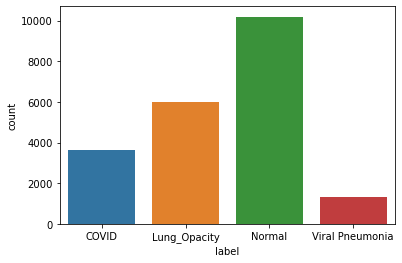

In [4]:
sns.countplot(x=df_metadata["label"])

## **Second Dataset: RSNA Pneumonia Detection Challenge**

**Raw CSV Files**

In [5]:
df_train_labels = rsna_pneumonia_detection_challenge.train_labels_csv
df_train_labels

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


In [6]:
df_class_info = rsna_pneumonia_detection_challenge.class_info_csv
df_class_info

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity


**Concatenated and Deduplicated CSV**

In [7]:
df_full = rsna_pneumonia_detection_challenge.full_csv
df_full

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.0,393.0,261.0,345.0,1


**Target Distribution**
* 0 is normal, 1 is Lung Opacity.

<AxesSubplot:xlabel='Target', ylabel='count'>

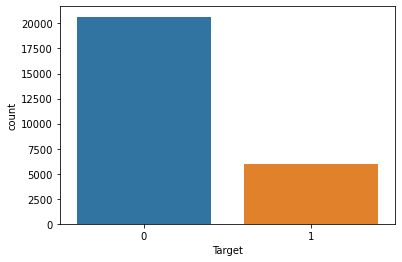

In [8]:
sns.countplot(x=df_train_labels[["patientId", "Target"]].drop_duplicates()['Target'])

**Detailed class Distribution**
* Note: "No Lung Opacity / Not Normal" class is regarded as Normal(0).

<AxesSubplot:xlabel='class', ylabel='count'>

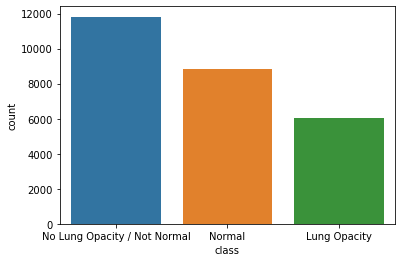

In [9]:
sns.countplot(x=df_class_info[["patientId", "class"]].drop_duplicates()['class'])

**Bounding Box Distribution**

In [10]:
df_lung_opacity = rsna_pneumonia_detection_challenge.lung_opacity_csv
df_lung_opacity

,patientId,class,x,y,width,height,Target
0,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
1,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
2,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,323.0,577.0,160.0,104.0,1
3,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,695.0,575.0,162.0,137.0,1
4,00aecb01-a116-45a2-956c-08d2fa55433f,Lung Opacity,288.0,322.0,94.0,135.0,1
...,...,...,...,...,...,...,...
9550,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,Lung Opacity,316.0,504.0,179.0,273.0,1
9551,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity,609.0,464.0,240.0,284.0,1
9552,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity,185.0,298.0,228.0,379.0,1
9553,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.0,393.0,261.0,345.0,1


<AxesSubplot:xlabel='x', ylabel='count'>

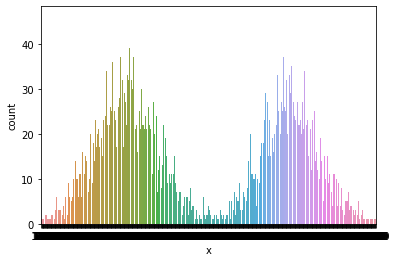

In [11]:
sns.countplot(x=df_lung_opacity['x'])

<AxesSubplot:xlabel='y', ylabel='count'>

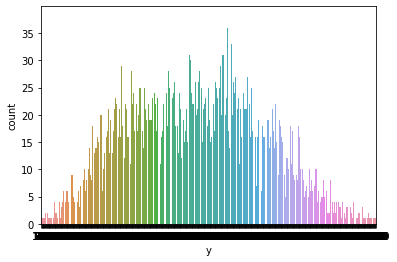

In [12]:
sns.countplot(x=df_lung_opacity['y'])

**Dicom File: Metadata and Image**

In [13]:
rd_path = rsna_pneumonia_detection_challenge.get_random_patient_id()
rd_path = rsna_pneumonia_detection_challenge.get_patient_path(rd_path)

In [14]:
metadata = dcm.dcmread(rd_path)
metadata

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.15024.1517874383.147322
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.15024.1517874383.147322
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

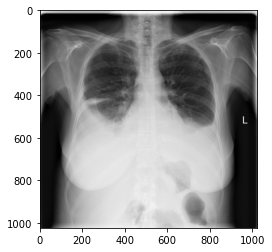

In [15]:
plt.imshow(metadata.pixel_array, cmap=plt.cm.gray)  # NOQA
plt.show()

**Bounding Box**

In [16]:
getPatientPath = rsna_pneumonia_detection_challenge.get_patient_path


def bbox_to_rect(bbox, color):  # bbox = (x1,y1,x2,y2) = (x,y,w+x,h+y)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2] - bbox[0], height=bbox[3] - bbox[1],
        fill=False, edgecolor=color, linewidth=1
    )


def box_image(patient_id):
    fig = plt.imshow(dcm.dcmread(getPatientPath(patient_id)).pixel_array, cmap=plt.cm.gray)  # NOQA
    df = df_lung_opacity[df_lung_opacity['patientId'] == patient_id]
    for _, (x, y, w, h) in df[['x', 'y', 'width', 'height']].iterrows():
        fig.axes.add_patch(bbox_to_rect([x, y, x+w, y+h], 'b'))
    plt.show()

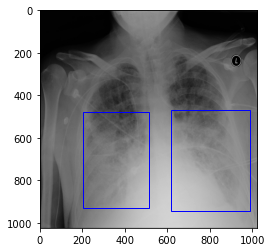

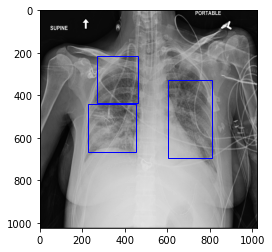

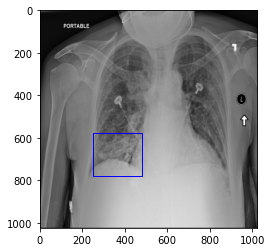

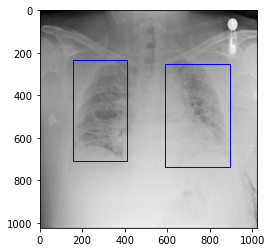

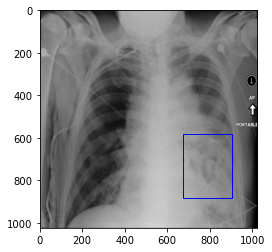

{None}

In [17]:
{*map(box_image, random.choices([*{*df_lung_opacity['patientId']}], k=5))}

**Number of Bounding Box per Patients**

In [18]:
df_n_box = df_lung_opacity.groupby('patientId').size().reset_index(name='boxes')
df_n_box.groupby('boxes').size().reset_index(name='patients')

,boxes,patients
0,1,2614
1,2,3266
2,3,119
3,4,13


<AxesSubplot:xlabel='boxes', ylabel='count'>

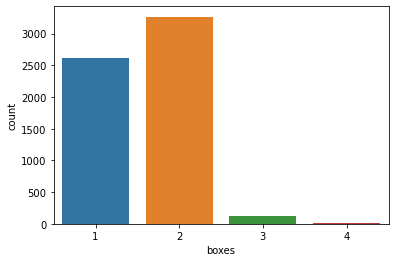

In [19]:
sns.countplot(x=df_n_box['boxes'])

**Bounding Box Distribution**

<AxesSubplot:xlabel='x', ylabel='y'>

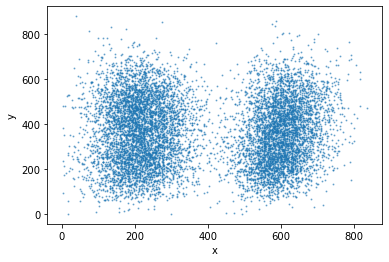

In [20]:
df_lung_opacity.plot.scatter(x='x', y='y', alpha=0.5, s=1)